# Time to get your hands dirty! Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope, i.e., errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the errors are $\sigma = 0.2$.

## Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point:

  $$ p(x_i | \mu, \sigma) $$

- Plot each of the individual likelihoods separately. Also plot their product (i.e., the likelihood of the dataset $\{ x_i \}$). Make sure the x-grid has enough points.
- Just read off the maximum likelihood solution (e.g., using `np.argsort`).
- Compare it with the MLE estimator derived above.

## Part 2

Check the Fisher matrix error estimate makes sense:

- Do a rough second-order differentiation of our log-likelihood function with `np.diff`,
- Divide by our $\Delta \theta^2$ to get the correct normalization,
- Multiply by $-1$,
- Then take the square root:

  $$ \sigma = \sqrt{-\frac{d^2 \log L}{d\theta^2}} $$

- Compare with the Fisher matrix error derived above.
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution.  
  *(The normalization won't be captured; you can rescale it as you like to check that it agrees.)*

## Part 3 (optional)

Let's make our model more realistic. Our $N$ measurements were taken on different nights, where the sky behaved differently (i.e., errors are heteroscedastic). Let's assume that each measurement has a $\sigma_i$ that is normally distributed with:

- Mean: **0.2**
- Standard deviation: **0.05**










In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy.stats import norm
import math

(array([1., 0., 0., 0., 0., 1., 0., 1., 3., 4., 0., 0., 1., 3., 1., 1., 7.,
        6., 3., 8., 7., 5., 3., 1., 5., 5., 5., 4., 4., 3., 2., 4., 1., 2.,
        2., 1., 2., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([-0.32213927, -0.2668763 , -0.21161334, -0.15635038, -0.10108741,
        -0.04582445,  0.00943852,  0.06470148,  0.11996445,  0.17522741,
         0.23049037,  0.28575334,  0.3410163 ,  0.39627927,  0.45154223,
         0.5068052 ,  0.56206816,  0.61733112,  0.67259409,  0.72785705,
         0.78312002,  0.83838298,  0.89364595,  0.94890891,  1.00417187,
         1.05943484,  1.1146978 ,  1.16996077,  1.22522373,  1.2804867 ,
         1.33574966,  1.39101262,  1.44627559,  1.50153855,  1.55680152,
         1.61206448,  1.66732745,  1.72259041,  1.77785337,  1.83311634,
         1.8883793 ,  1.94364227,  1.99890523,  2.0541682 ,  2.10943116,
         2.16469412,  2.21995709,  2.27522005,  2.33048302,  2.38574598,
         2.44100895]),
 <BarContainer object

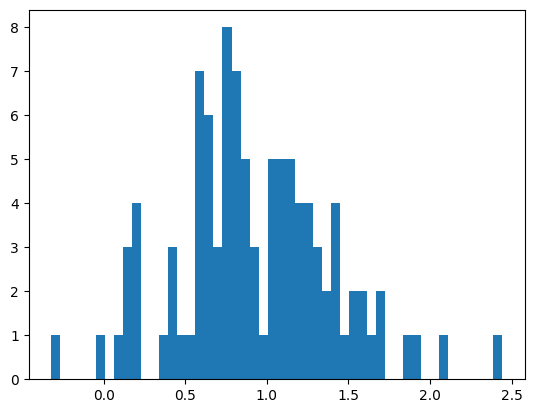

In [2]:
N=100
mu_true=1 #True position
sigma_true=0.2 #Homoscedastic error
sigma_gen=0.5 #Measurement error
xi= np.random.normal(mu_true,sigma_gen,N) 
plt.hist(xi, bins=50)

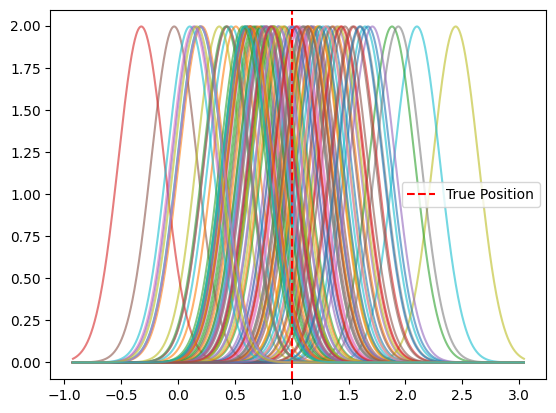

In [3]:
value=np.linspace(min(xi)-3*sigma_true,max(xi)+3*sigma_true, 1000)
for i in range(N):
    gauss=norm.pdf(value, xi[i], sigma_true) #Drawing of Gaussians centred on each measurement
    plt.plot(value, gauss, alpha=0.6)

plt.axvline(mu_true, color="red", linestyle="--", label="True Position")
plt.legend()


    

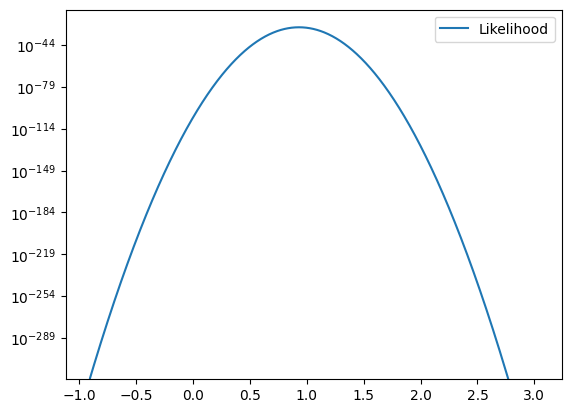

In [4]:
likelihood=[]
for i in range(len(value)):
    l=1
    for j in range (N):
        l *= norm.pdf(value[i] ,xi[j], sigma_gen) 
    likelihood.append(l)

plt.plot(value, likelihood, label="Likelihood")
plt.yscale('log')
plt.legend()

/tmp/ipykernel_1014/616198492.py:2: RuntimeWarning: divide by zero encountered in log
  log_likelihood=np.log(likelihood)


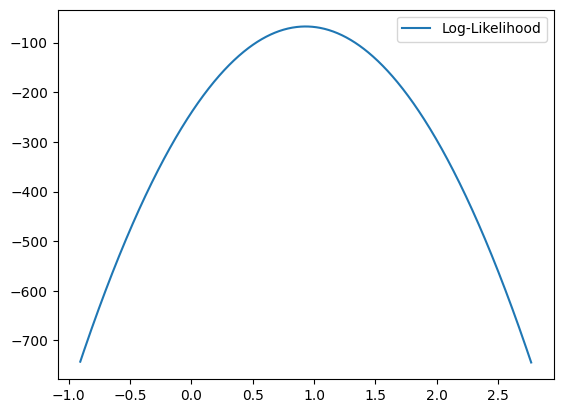

In [5]:
likelihood=np.array(likelihood)
log_likelihood=np.log(likelihood)
plt.plot(value, log_likelihood, label="Log-Likelihood")
plt.legend()


In [6]:
max_value = value[np.argmax(likelihood)]
print("The maximum of the likelihood is", max_value)
mu_estimator=np.mean(xi)
print("The MLE estimator for μ is", mu_estimator)
err_max=np.abs(max_value-mu_true)/mu_true
err_est=np.abs(mu_estimator-mu_true)/mu_true
print("The relativ error on the maximum of the likelihood is", err_max)
print("The relativ error on the MLE estimator is", err_est)



The maximum of the likelihood is 0.930503589967234
The MLE estimator for μ is 0.9312691972039552
The relativ error on the maximum of the likelihood is 0.06949641003276597
The relativ error on the MLE estimator is 0.06873080279604482


In [8]:
derivate=np.diff(log_likelihood,2)
dteta=value[1]-value[0]
f=-1*derivate/(dteta**2)
mfischer_n=f[np.argmax(likelihood)-2]
sigmamu_n=np.sqrt(1/mfischer_n)
print("The expected numerical error of μ is ", sigmamu_n)

matrixf_mu=-N/sigma_gen**2
sigmamu=np.sqrt(-1/matrixf_mu)
print("The expected error of μ is ", sigmamu)



The expected numerical error of μ is  0.049999999999946206
The expected error of μ is  0.05


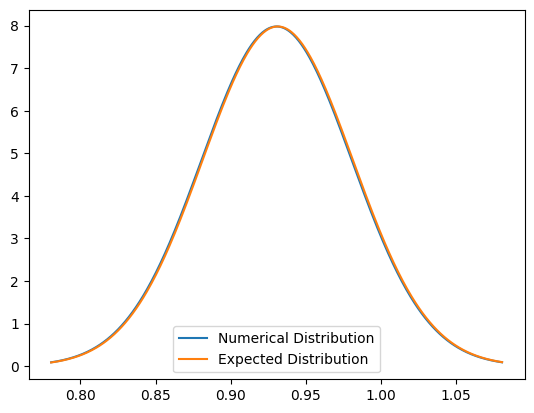

In [9]:
x=np.linspace(max_value-3*sigmamu_n,max_value+3*sigmamu_n, 500)
gauss_n=norm.pdf(x,max_value,sigmamu_n)
gauss=norm.pdf(x,mu_estimator,sigmamu)
plt.plot(x,gauss_n,label="Numerical Distribution")
plt.plot(x,gauss, label="Expected Distribution")
plt.legend()


Generalize the code for heteoscedastic measuraments

In [10]:
N=100
mu_true=1
sigma_true=0.2
sigma_gen=0.5 #Measurement error
mu_s=0.2
sigma_s=0.05
sigmai=np.random.normal(mu_s, sigma_s,N)
xi= np.random.normal(mu_true,sigma_gen,N) 

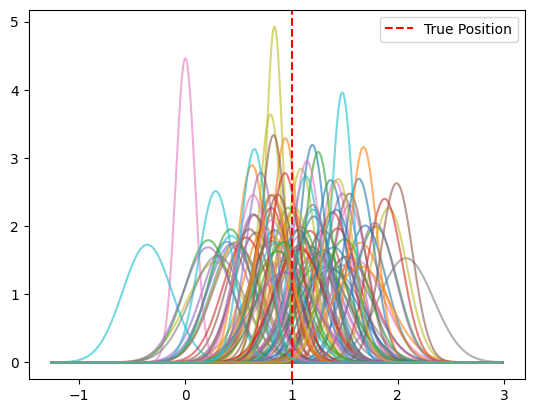

In [11]:
value=np.linspace(min(xi)-3*max(sigmai),max(xi)+3*max(sigmai), 1000)
for i in range(N):
    gauss=norm.pdf(value, xi[i], sigmai[i]) #Drawing of Gaussians centred on each measurement
    plt.plot(value, gauss, alpha=0.6)

plt.axvline(mu_true, color="red", linestyle="--", label="True Position")
plt.legend()


/tmp/ipykernel_1014/3904258403.py:9: RuntimeWarning: divide by zero encountered in log
  log_likelihood=np.log(likelihood)


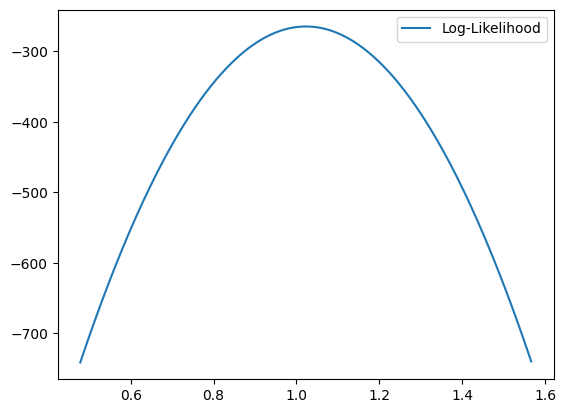

In [12]:
likelihood=[]
for i in range(len(value)):
    l=1
    for j in range (N):
        l *= norm.pdf(value[i] ,xi[j], sigmai[j]) 
    likelihood.append(l)

likelihood=np.array(likelihood)
log_likelihood=np.log(likelihood)
plt.plot(value, log_likelihood, label="Log-Likelihood")
plt.legend()

In [13]:
max_value = value[np.argmax(likelihood)]
print("The maximum of the likelihood is", max_value)
num=np.sum(xi/(sigmai**2))
den=np.sum(1/(sigmai**2))
mu_estimator=num/den
print("The MLE estimator for μ is", mu_estimator)

err_max=np.abs(max_value-mu_true)/mu_true
err_est=np.abs(mu_estimator-mu_true)/mu_true
print("The relativ error on the maximum of the likelihood is", err_max)
print("The relativ error on the MLE estimator is", err_est)


The maximum of the likelihood is 1.0222847437294753
The MLE estimator for μ is 1.022720416961431
The relativ error on the maximum of the likelihood is 0.02228474372947531
The relativ error on the MLE estimator is 0.02272041696143101


In [14]:
derivate=np.diff(log_likelihood,2)
dteta=value[1]-value[0]
f=-1*derivate/(dteta**2)
mfischer_n=f[np.argmax(likelihood)-2]
sigmamu_n=np.sqrt(1/mfischer_n)
print("The expected numerical error of μ is ", sigmamu_n)

matrixf_mu=den
sigmamu=np.sqrt(1/matrixf_mu)
print("The expected error of μ is ", sigmamu)


The expected numerical error of μ is  0.017632831348141344
The expected error of μ is  0.01763283134814543


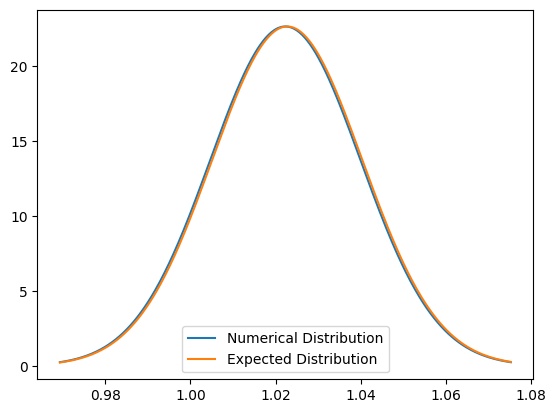

In [15]:
x=np.linspace(max_value-3*sigmamu_n,max_value+3*sigmamu_n, 500)
gauss_n=norm.pdf(x,max_value,sigmamu_n)
gauss=norm.pdf(x,mu_estimator,sigmamu)
plt.plot(x,gauss_n,label="Numerical Distribution")
plt.plot(x,gauss, label="Expected Distribution")
plt.legend()